# Desafío 1:
## Preparación del ambiente de trabajo

In [1]:
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import pandas as pd
import numpy as np

df = pd.read_csv('default_credit.csv', index_col=0)
df.head()

,default,student,balance,income
index,,,,
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


# Desafío 2: 
## Análisis exploratorio

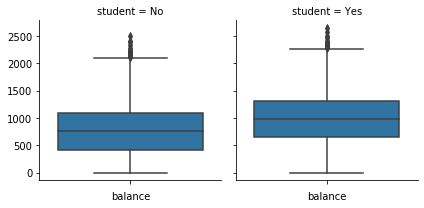

In [39]:
g = sns.FacetGrid(df, col='student', col_wrap=2)
g = g.map(sns.boxplot, 'balance', orient  = "v", order = df['student'].unique())

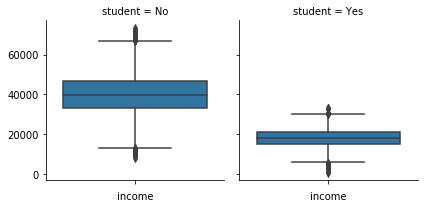

In [41]:
g = sns.FacetGrid(df, col='student', col_wrap=2)
g = g.map(sns.boxplot, 'income', orient  = "v", order = df['student'].unique())

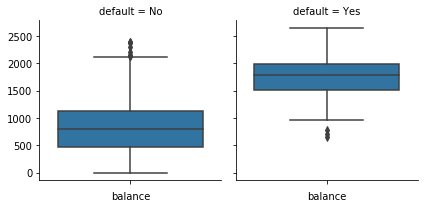

In [43]:
g = sns.FacetGrid(df, col='default', col_wrap=2)
g = g.map(sns.boxplot, 'balance', orient  = "v", order = df['default'].unique())

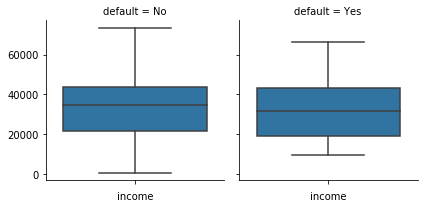

In [46]:
g = sns.FacetGrid(df, col='default', col_wrap=2)
g = g.map(sns.boxplot, 'income', orient  = "v", order = df['default'].unique())

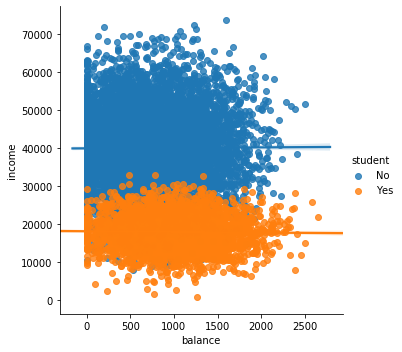

In [64]:
sns.lmplot(x="balance", y="income", hue="student", data=df)

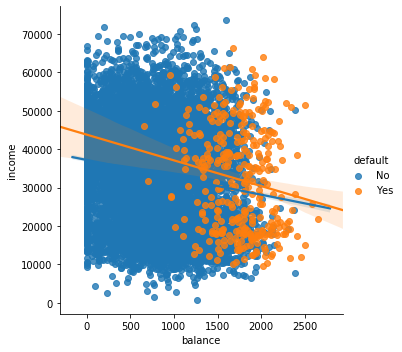

In [66]:
sns.lmplot(x="balance", y="income", hue="default", data=df)

# Desafío 3:
## Modelación econométrica

In [71]:
df['binary_student'] = np.where(df['student'] == 'No' , 0, 1)
df['binary_default'] = np.where(df['default'] == 'No' , 0, 1)
df.head()

,default,student,balance,income,binary_student,binary_default
index,,,,,,
1,No,No,729.526495,44361.625074,0,0
2,No,Yes,817.180407,12106.134700,1,0
3,No,No,1073.549164,31767.138947,0,0
4,No,No,529.250605,35704.493935,0,0
5,No,No,785.655883,38463.495879,0,0


In [75]:
m1 = smf.logit("binary_default ~ balance + income + binary_student", df).fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [81]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         binary_default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Thu, 11 Jul 2019   Pseudo R-squ.:                  0.4619
Time:                        21:54:53   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance            0.0057      0.000     24.737      0.000       0.005       0.006
income          3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
binary_student    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""